In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris, make_moons
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

In [3]:
X = iris.data[:, 2:]
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [8]:
from sklearn.tree import export_graphviz

In [19]:
export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [27]:
X, y = make_moons(n_samples=10000, noise=0.4)

C:\Users\vmrod\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

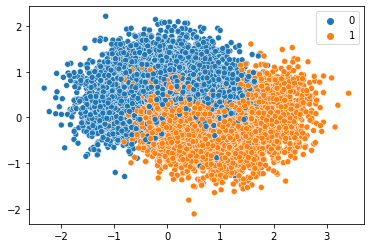

In [31]:
sns.scatterplot(X[:,0], X[:,1], hue=y)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.model_selection import GridSearchCV

In [66]:
params = {
    'max_leaf_nodes':[14,15,16,17,18]
}

In [96]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params,cv=5, scoring='accuracy', verbose=10)

In [97]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START max_leaf_nodes=14...........................................
[CV 1/5; 1/5] END ............max_leaf_nodes=14;, score=0.857 total time=   0.0s
[CV 2/5; 1/5] START max_leaf_nodes=14...........................................
[CV 2/5; 1/5] END ............max_leaf_nodes=14;, score=0.871 total time=   0.0s
[CV 3/5; 1/5] START max_leaf_nodes=14...........................................
[CV 3/5; 1/5] END ............max_leaf_nodes=14;, score=0.860 total time=   0.0s
[CV 4/5; 1/5] START max_leaf_nodes=14...........................................
[CV 4/5; 1/5] END ............max_leaf_nodes=14;, score=0.858 total time=   0.0s
[CV 5/5; 1/5] START max_leaf_nodes=14...........................................
[CV 5/5; 1/5] END ............max_leaf_nodes=14;, score=0.866 total time=   0.0s
[CV 1/5; 2/5] START max_leaf_nodes=15...........................................
[CV 1/5; 2/5] END ............max_leaf_nodes=15;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [14, 15, 16, 17, 18]},
             scoring='accuracy', verbose=10)

In [98]:
mod = grid.best_estimator_

In [100]:
np.mean(mod.predict(X_test) == y_test)

0.856

In [101]:
from sklearn.model_selection import ShuffleSplit

In [106]:
spliter = ShuffleSplit(n_splits=1000, train_size=100)

In [110]:
from sklearn import clone

In [160]:
models = list()
for train_idx, test_idx in spliter.split(X_train):
    mod = DecisionTreeClassifier(max_leaf_nodes=17)
    mod.fit(X_train[train_idx], y_train[train_idx])
    models.append(mod)

In [161]:
preds = []
for mod in models:
    preds.append(mod.predict(X_test))
preds = np.array(preds)

In [122]:
from scipy.stats import mode

In [162]:
maj_votes = mode(preds, axis=0)[0].ravel()

In [167]:
np.mean(maj_votes == y_test)

0.853